In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: BMW-i8

**Una BMW i8 accelera a tavoletta su un rettilineo**

<center>
<img src="assets/bmw-i8.png" width=80%/>
</center>

## Esercizio: BMW-i8

**Una BMW i8 accelera a tavoletta su un rettilineo**

Supponiamo che il motore eroghi una forza costante $F$

* L'auto ha un motore elettrico, così l'assunzione non è così irrealistica

Si oppone alla direzione del moto la forza di trascinamento:

$$
F_t = -\frac{1}{2} \rho C_D A v |v|
$$

* $\rho$ è la densità dell'aria, $v$ è la velocità
* $A$ è la superficie della sezione dell'auto
* $C_D$ è un coefficiente di trascinamento

## Esercizio: BMW-i8

**Quindi il sistema è definito dall'ODE:**

$$
\ddot{x} = \frac{1}{m} (F + F_t)
$$

Che può essere riscritta come:

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v}
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m} (F + F_t)
\end{array}\right)
$$

* Dove $m$ è la massa dell'auto

## Esercizio: BMW-i8

**Prima di tutto, procediamo a caricare i dati del problema**

Potete farlo usando la cella seguente:

In [2]:
import numpy as np

rho = 1.25 # Densita' dell'aria
A = 2.5 * 1.2 # Superficie della seziojne
Cd = 0.82 # Coefficiente di trascinamento
m = 1539 # Massa dell'auto
F = 10000 # Forza di accelerazione

## Esercizio: BMW-i8

**Nel modulo `sol.bmw` si definisca una classe:**

```python
class BMWDstate:
    def __init__(self, rho, A, Cd, m, F):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato iniziale $(x_0, v_0) = (0, 0)$ ed il tempo iniziale $t_0 = 0$

In [5]:
from sol import bmw

X0 = np.array([0, 0])
t0 = 0

dstate = bmw.BMWDstate(rho, A, Cd, m, F)
dstate(X=X0, t=t0)

array([0.       , 6.4977258])

## Esercizio: BMW-i8

**Nel modulo `sol.bmw` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento dell'automobile

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `base.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento dell'automobile**

* Per un periodo di 60''
* ...A partire dallo stato iniziale $(x, v) = (0, 0)$

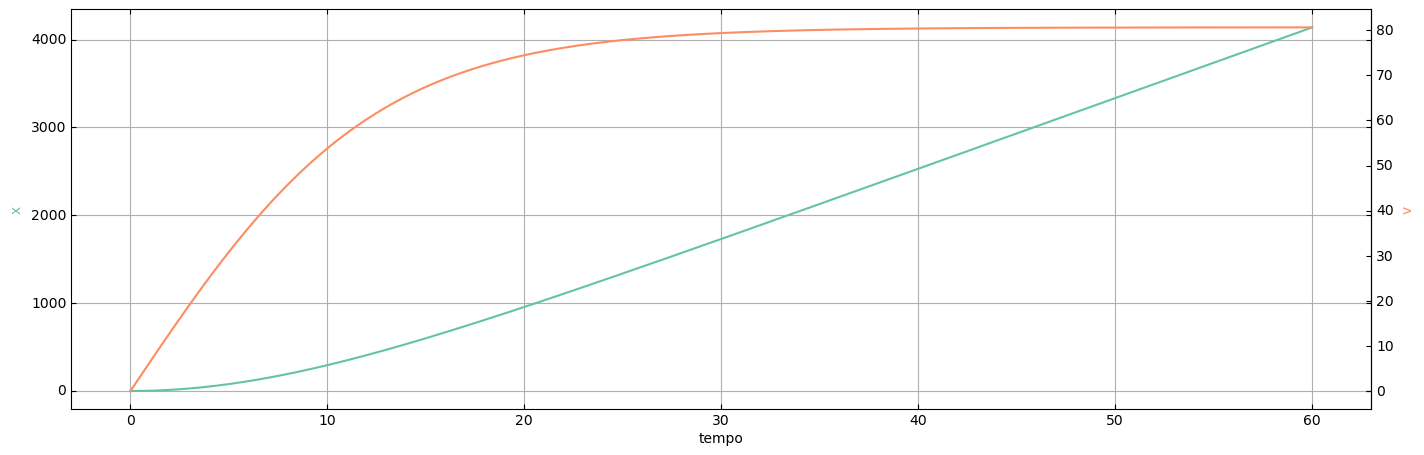

In [7]:
from scipy.integrate import odeint

X0 = np.array([-5, 0])
t = np.linspace(0, 60, 60 * 10)

X, t = bmw.simulate(dstate, X0, t)

## Esercizio: BMW-i8

**Nel modulo `sol.bmw` si definisca una funzione:**

```python
def x_in_3s(X, t)
```

* Che restituisca la strada percorsa in 3 secondi

Si stampino a video il valore

In [8]:
x_in_3s = bmw.x_in_3s(X, t)
print(f'Metri percorsi in 3s: {x_in_3s}')

Metri percorsi in 3s: 19.122174668265455


## Esercizio: BMW-i8

**Nel modulo `sol.bmw` si definisca una funzione:**

```python
def time_to_100kph(X, t)
```

* Che restituisca il tempo in corrispondenza del quale
* ...L'automobile ha raggiunto la velocità di 27.8 m/s

Si stampino a video il valore

In [9]:
t_to_100 = bmw.time_to_100kph(X, t)
print(f'Tempo per raggiungere i 27.8 m/s: {t_to_100}')

Tempo per raggiungere i 27.8 m/s: 4.461161124594196


## Esercizio: BMW-i8

**Nel modulo `sol.bmw` si definisca una funzione:**

```python
def max_speed(X, t)
```

* Che restituisca la massima velocità raggiunta nella simulazione

Si stampino a video il valore

In [10]:
max_speed = bmw.max_speed(X, t)
print(f'Massima velocità raggiunta: {max_speed}')

Massima velocità raggiunta: 80.63758150314992
